<a href="https://colab.research.google.com/github/NTBDuy/LSTM-Project/blob/main/LSTM_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DOWNLOAD STOCK DATA

In [ ]:
# Download AAPL stock
import yfinance as yf

start_date = '2022-01-01'
end_date = '2023-10-26'
symbol = 'AAPL' #  Apple Inc.

data = yf.download(symbol, start=start_date, end=end_date)
data.to_csv('/content/drive/MyDrive/AI/data/historical_stock_data.csv')

[*********************100%%**********************]  1 of 1 completed


##PREDICTING STOCK PRICÉ

(305, 60)
Epoch 1/10
305/305 [==============================] - 14s 33ms/step - loss: 0.0102
Epoch 2/10
305/305 [==============================] - 8s 26ms/step - loss: 0.0054
Epoch 3/10
305/305 [==============================] - 11s 35ms/step - loss: 0.0039
Epoch 4/10
305/305 [==============================] - 9s 29ms/step - loss: 0.0036
Epoch 5/10
305/305 [==============================] - 9s 29ms/step - loss: 0.0033
Epoch 6/10
305/305 [==============================] - 10s 32ms/step - loss: 0.0031
Epoch 7/10
305/305 [==============================] - 8s 26ms/step - loss: 0.0030
Epoch 8/10
305/305 [==============================] - 10s 32ms/step - loss: 0.0028
Epoch 9/10
305/305 [==============================] - 9s 31ms/step - loss: 0.0024
Epoch 10/10
3/3 [==============================] - 1s 15ms/step
Root Mean Squared Error: 4.034970293988239


<ipython-input-6-e289bc14d898>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


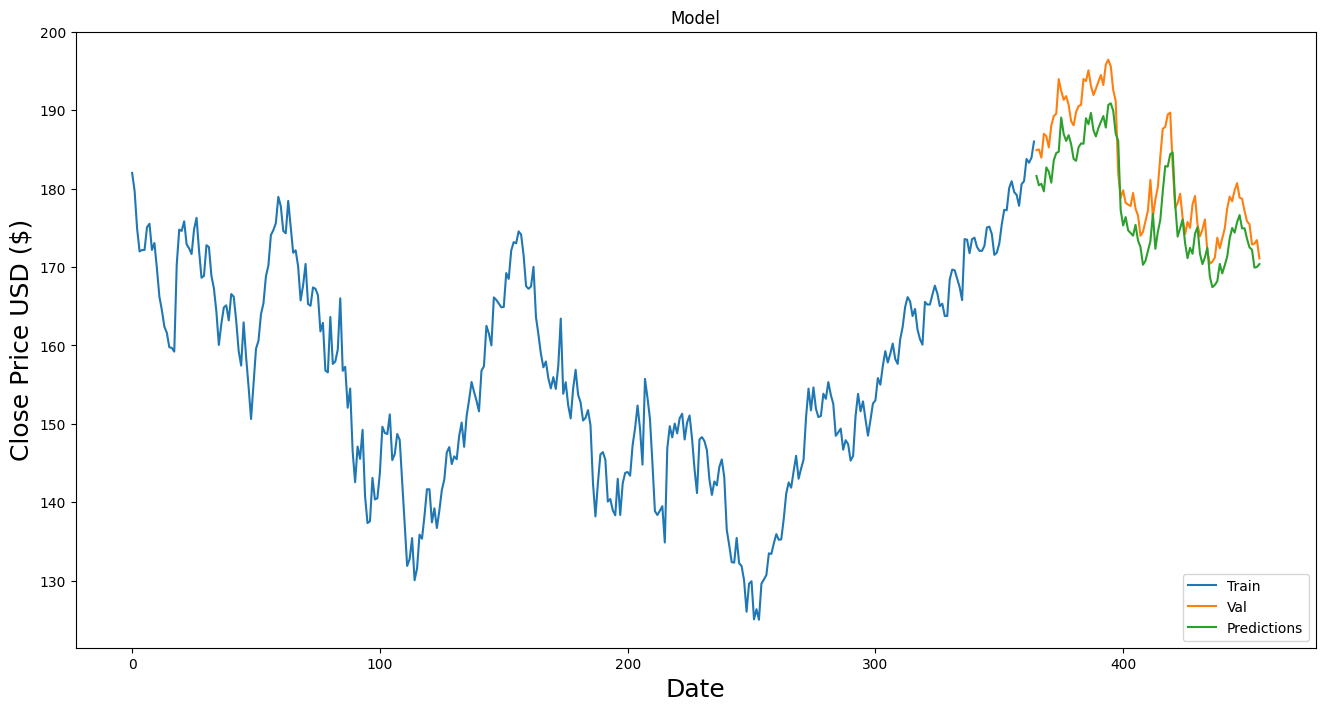

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the data
df = pd.read_csv('/content/drive/MyDrive/AI/data/historical_stock_data.csv')
df = df[['Close']]
dataset = df.values
training_data_len = int(np.ceil(len(dataset) * 0.8))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the data to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Display shape
print(x_train.shape)

# Reshape the data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # (305, 60, 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1))) # input_shape=(60, 1)
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

# Create the testing data
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to numpy arrays
x_test = np.array(x_test)

# Reshape the data for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('Root Mean Squared Error:', rmse)

# Plot the data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()